<a href="https://colab.research.google.com/github/Aditya7298/Linear-Regression/blob/master/BostonDataSetLinRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **This Notebook uses Linear Regression to predict Median House Prices using the Boston Housing Data Set**

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

**Loading Data and Displaying Data Description**

In [2]:
from sklearn.datasets import load_boston
boston_datasets = load_boston()
print(boston_datasets['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

**Setting up data and displaying the first five tuples of Dataset**

In [4]:
boston_data = pd.DataFrame(boston_datasets['data'])
boston_data.columns = boston_datasets['feature_names']
target_values = pd.Series(boston_datasets['target'])
data = boston_data.copy()
data['MEDV'] = target_values
(data.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**Using the Correlation values, we can see that the target label(MEDV) is highly positively correlated with 'RM'(Number of Rooms) and highly negatively correlated with 'LSTAT'(%Lower status of population) and Pupil Teacher Ratio**

In [5]:
data.corr()['MEDV'].sort_values(ascending = True)

LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.695360
MEDV       1.000000
Name: MEDV, dtype: float64

**Observing the subplots, we can see that the Median Price of Houses varies linearly with the features - 'LSTAT' and 'RM' and we will select these 2 features to perform linear regression**

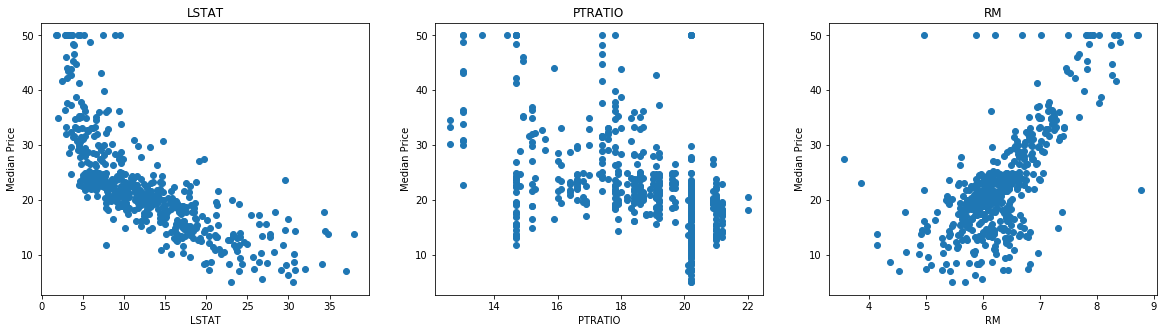

In [6]:
%matplotlib inline
plt.figure(figsize = (20,5))

features = ['LSTAT', 'PTRATIO', 'RM']

for i in range(0,3):
    x = np.array(data[features[i]])
    y = np.array(data['MEDV'])
    plt.subplot(1,3,i+1)
    plt.scatter(x,y)
    plt.title(features[i])
    plt.xlabel(features[i])
    plt.ylabel('Median Price')

**Feature Normalization**

In [0]:
data['LSTAT'] = data['LSTAT']/35
data['RM'] = data['RM']/9

**Converting data into np array and splitting it into test and train sets(20% of data is taken as test set)**

In [0]:
from sklearn import model_selection
X = np.array(data[['LSTAT','RM']])
Y = np.array(data['MEDV'])
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y,test_size = .2, random_state = 5)

**Training the Linear Regression Model**

In [9]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Calculating the training and test accuracy**

In [12]:
from sklearn.metrics import r2_score
Y_test_predict = lin_model.predict(X_test)
Y_train_predict = lin_model.predict(X_train)
error_test = r2_score(Y_test,Y_test_predict)
error_train = r2_score(Y_train,Y_train_predict)
print('Training Accuracy: ' + str(error_train*100))
print('Test Accuracy: ' + str(error_test*100))

Training Accuracy: 63.007451493317014
Test Accuracy: 66.28996975186952


**Displaying the True Median Values and the Predicted Values on the test set**

In [14]:
predicted_data_df = pd.DataFrame(Y_test)
predicted_data_df['Predicted Data'] = pd.DataFrame(Y_test_predict)
predicted_data_df
predicted_data_df.columns = [['Real Value', 'Predicted Value']]
predicted_data_df

,Real Value,Predicted Value
0,37.6,37.389994
1,27.9,29.792906
2,22.6,25.867553
3,13.8,0.313708
4,35.2,33.313856
5,10.4,7.971361
6,23.9,30.706639
7,29.0,27.830768
8,22.8,26.266931
9,23.2,21.978717
